# **Environment Setup**

###Import libraries

In [6]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from os import listdir

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight 

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import Sequential

from keras.applications.vgg19 import VGG19
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

from PIL import Image

###Import data to dataframe

In [ ]:
# Import data label CSV
df = pd.read_csv('D:/Kuliah/Semester 6/Bangkit/Capstone Project/full_df.csv')

# Show all data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


In [ ]:
# Dataframe slicing for filename and labels
df_1 = df.loc[:, ['filename','labels']]
display(df_1)

,filename,labels
0,0_right.jpg,['N']
1,1_right.jpg,['N']
2,2_right.jpg,['D']
3,4_right.jpg,['D']
4,5_right.jpg,['D']
5,6_right.jpg,['D']
6,7_right.jpg,['D']
7,8_right.jpg,['N']
8,9_right.jpg,['O']
9,10_right.jpg,['N']


# **Preparation, Training, and Testing**

## **Preparing data**

### Old dataset

In [ ]:
# Directory
directory_train = 'D:/Kuliah/Semester 6/Bangkit/Capstone Project/preprocessed_images'
directory_test = 'D:/Kuliah/Semester 6/Bangkit/Capstone Project/ODIR-5K/ODIR-5K/Testing Images'

# Dataframe slicing (Cataract)
df_cat = df.loc[df['labels'] == "['C']", ['filename','labels']]

# Dataframe slicing (Normal)
df_norm = df.loc[df['labels'] == "['N']", ['filename','labels']].sample(300, random_state=42)

# Dataframe slicing (Glaucoma)
df_gl = df.loc[df['labels'] == "['G']", ['filename','labels']]

print('Cataract Train : ',df_cat.shape[0])
print('Normal Train   : ',df_norm.shape[0])
print('Glaucoma Train : ',df_gl.shape[0])

Cataract Train :  293
Normal Train   :  300
Glaucoma Train :  284


In [ ]:
# Merged Dataframe (Cataract)
df_2 = pd.concat([df_cat, df_norm, df_gl], ignore_index=True, sort=False)
df_2 = shuffle(df_2)

print(df_2.count())

filename    877
labels      877
dtype: int64


In [ ]:
# Image data Generator
datagen = ImageDataGenerator(rescale = 1./255.,
                             #rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             fill_mode = 'nearest',
                             horizontal_flip = True,
                             validation_split=0.35)

train_generator = datagen.flow_from_dataframe(
    df_2,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    df_2,
    directory=directory_train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical',
    subset='validation'
)

Found 571 validated image filenames belonging to 3 classes.
Found 306 validated image filenames belonging to 3 classes.


###New dataset

In [ ]:
# assign directory
directory_1 = 'D:/Kuliah/Semester 6/Bangkit/Capstone Project/preprocessed_images'
directory_23_C =  'D:/Kuliah/Semester 6/Bangkit/Capstone Project/dataset/cataract'
directory_23_G =  'D:/Kuliah/Semester 6/Bangkit/Capstone Project/dataset/glaucoma'
directory_23_N =  'D:/Kuliah/Semester 6/Bangkit/Capstone Project/dataset/normal'
 
# Create buffer variable and iterate over files in that directory
dir_1_counter = 0
dir_23_counter = 0

# Counting data
for image_name in os.listdir(directory_1):
  dir_1_counter += 1

for image_name in os.listdir(directory_23_C):
  dir_23_counter += 1

for image_name in os.listdir(directory_23_G):
  dir_23_counter += 1

for image_name in os.listdir(directory_23_N):
  dir_23_counter += 1

print('Total Images in Data 1   :', dir_1_counter)
print('Total Images in Data 2&3 :', dir_23_counter)

Total Images in Data 1   : 6392
Total Images in Data 2&3 : 669


In [ ]:
# Collect filename and label from directory
filenames = []
labels = []

for image_name in os.listdir(directory_23_C):
  filenames.append('D:/Kuliah/Semester 6/Bangkit/Capstone Project/dataset/cataract'+image_name)
  labels.append("['C']")

for image_name in os.listdir(directory_23_G):
  filenames.append('D:/Kuliah/Semester 6/Bangkit/Capstone Project/dataset/glaucoma'+image_name)
  labels.append("['G']")

for image_name in os.listdir(directory_23_N):
  filenames.append('D:/Kuliah/Semester 6/Bangkit/Capstone Project/dataset/normal'+image_name)
  labels.append("['N']")

In [ ]:
# Create New DataFrame
df_23 = pd.DataFrame({'filename': filenames, 'labels': labels})
df_23.head()

,filename,labels
0,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
1,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
2,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
3,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
4,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']


In [ ]:
# Dataframe slicing (Cataract)
df_cat = df_23.loc[df_23['labels'] == "['C']", ['filename','labels']]

# Dataframe slicing (Glaucoma)
df_gl = df_23.loc[df_23['labels'] == "['G']", ['filename','labels']]

# Dataframe slicing (Normal)
df_norm = df_23.loc[df_23['labels'] == "['N']", ['filename','labels']]

print('Cataract : ',df_cat.shape[0])
print('Normal   : ',df_norm.shape[0])
print('Glaucoma : ',df_gl.shape[0])

Cataract :  100
Normal   :  300
Glaucoma :  269


In [ ]:
# Sampling data from data 1
df_C_1 = df_1[df_1.labels == "['C']"].sample(200, random_state=42)
filename_c = df_C_1['filename'].values
labels_c = df_C_1['labels'].values

df_G_1 = df_1[df_1.labels == "['G']"].sample(31, random_state=42)
filename_g = df_G_1['filename'].values
labels_g = df_G_1['labels'].values

In [ ]:
# Append file directory to filename
for x in range(len(filename_c)):
  filename_c[x] = directory_1 + '/' + filename_c[x]

for x in range(len(filename_g)):
  filename_g[x] = directory_1 + '/' + filename_g[x]

In [ ]:
# Create DataFrame from Data 1 Sample
df_sample_1 = pd.DataFrame({'filename':np.concatenate((filename_c, filename_g)), 'labels':np.concatenate((labels_c, labels_g))})
df_sample_1.head()

,filename,labels
0,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
1,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
2,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
3,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
4,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']


In [ ]:
df_merged = pd.concat([df_23, df_sample_1], ignore_index=True)
df_merged.head()

,filename,labels
0,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
1,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
2,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
3,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
4,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']


In [ ]:
# Dataframe slicing (Cataract)
df_cat = df_merged.loc[df_merged['labels'] == "['C']", ['filename','labels']]

# Dataframe slicing (Glaucoma)
df_gl = df_merged.loc[df_merged['labels'] == "['G']", ['filename','labels']]

# Dataframe slicing (Normal)
df_norm = df_merged.loc[df_merged['labels'] == "['N']", ['filename','labels']]

print('Cataract : ',df_cat.shape[0])
print('Normal   : ',df_norm.shape[0])
print('Glaucoma : ',df_gl.shape[0])

Cataract :  300
Normal   :  300
Glaucoma :  300


In [ ]:
df_merged = shuffle(df_merged, random_state=42).reset_index(drop=True)
df_merged.head()

,filename,labels
0,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
1,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
2,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['G']
3,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['N']
4,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']


###Old + New dataset

In [ ]:
# assign directory
directory_1 = 'D:/Kuliah/Semester 6/Bangkit/Capstone Project/preprocessed_images'
directory_23_C =  'D:/Kuliah/Semester 6/Bangkit/Capstone Project/dataset/cataract'
directory_23_G =  'D:/Kuliah/Semester 6/Bangkit/Capstone Project/dataset/glaucoma'
directory_23_N =  'D:/Kuliah/Semester 6/Bangkit/Capstone Project/dataset/normal'
 
# Create buffer variable and iterate over files in that directory
dir_1_counter = 0
dir_23_counter = 0

# Counting data
for image_name in os.listdir(directory_1):
  dir_1_counter += 1

for image_name in os.listdir(directory_23_C):
  dir_23_counter += 1

for image_name in os.listdir(directory_23_G):
  dir_23_counter += 1

for image_name in os.listdir(directory_23_N):
  dir_23_counter += 1

print('Total Images in Data 1   :', dir_1_counter)
print('Total Images in Data 2&3 :', dir_23_counter)

Total Images in Data 1   : 6392
Total Images in Data 2&3 : 669


In [ ]:
# Collect filename and label from directory
filenames = []
labels = []

for image_name in os.listdir(directory_23_C):
  filenames.append('D:/Kuliah/Semester 6/Bangkit/Capstone Project/dataset/cataract/'+image_name)
  labels.append("['C']")

for image_name in os.listdir(directory_23_G):
  filenames.append('D:/Kuliah/Semester 6/Bangkit/Capstone Project/dataset/glaucoma/'+image_name)
  labels.append("['G']")

for image_name in os.listdir(directory_23_N):
  filenames.append('D:/Kuliah/Semester 6/Bangkit/Capstone Project/dataset/normal/'+image_name)
  labels.append("['N']")

In [ ]:
# Create New DataFrame
df_23 = pd.DataFrame({'filename': filenames, 'labels': labels})
df_23.head()

,filename,labels
0,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
1,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
2,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
3,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
4,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']


In [ ]:
# Dataframe slicing (Cataract)
df_cat = df_23.loc[df_23['labels'] == "['C']", ['filename','labels']]

# Dataframe slicing (Glaucoma)
df_gl = df_23.loc[df_23['labels'] == "['G']", ['filename','labels']]

# Dataframe slicing (Normal)
df_norm = df_23.loc[df_23['labels'] == "['N']", ['filename','labels']]

print('Cataract : ',df_cat.shape[0])
print('Normal   : ',df_norm.shape[0])
print('Glaucoma : ',df_gl.shape[0])

Cataract :  100
Normal   :  300
Glaucoma :  269


In [ ]:
# Sampling data from data 1
df_C_1 = df_1[df_1.labels == "['C']"].sample(250, random_state=42)
filename_c = df_C_1['filename'].values
labels_c = df_C_1['labels'].values

df_N_1 = df_1[df_1.labels == "['N']"].sample(50, random_state=42)
filename_n = df_N_1['filename'].values
labels_n = df_N_1['labels'].values

df_G_1 = df_1[df_1.labels == "['G']"].sample(81, random_state=42)
filename_g = df_G_1['filename'].values
labels_g = df_G_1['labels'].values

In [ ]:
# Append file directory to filename
for x in range(len(filename_c)):
  filename_c[x] = directory_1 + '/' + filename_c[x]

for x in range(len(filename_n)):
  filename_n[x] = directory_1 + '/' + filename_n[x]

for x in range(len(filename_g)):
  filename_g[x] = directory_1 + '/' + filename_g[x]

In [ ]:
# Create DataFrame from Data 1 Sample
df_sample_1 = pd.DataFrame({'filename':np.concatenate((filename_c, filename_n, filename_g)), 'labels':np.concatenate((labels_c, labels_n, labels_g))})
df_sample_1.head()

,filename,labels
0,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
1,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
2,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
3,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
4,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']


In [ ]:
df_mix = pd.concat([df_23, df_sample_1], ignore_index=True)
df_mix.head()

,filename,labels
0,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
1,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
2,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
3,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
4,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']


In [ ]:
# Dataframe slicing (Cataract)
df_cat = df_mix.loc[df_mix['labels'] == "['C']", ['filename','labels']]

# Dataframe slicing (Glaucoma)
df_gl = df_mix.loc[df_mix['labels'] == "['G']", ['filename','labels']]

# Dataframe slicing (Normal)
df_norm = df_mix.loc[df_mix['labels'] == "['N']", ['filename','labels']]

print('Cataract : ',df_cat.shape[0])
print('Normal   : ',df_norm.shape[0])
print('Glaucoma : ',df_gl.shape[0])

Cataract :  350
Normal   :  350
Glaucoma :  350


In [ ]:
df_mix = shuffle(df_mix, random_state=42).reset_index(drop=True)
df_mix.head()

,filename,labels
0,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['G']
1,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']
2,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['N']
3,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['N']
4,D:/Kuliah/Semester 6/Bangkit/Capstone Project/...,['C']


In [ ]:
# Split Train and Test from Dataframe
train, val = train_test_split(df_mix, test_size=0.25, random_state=42)

In [ ]:
print('Cataract Train Count: ',train[train['labels']=="['C']"].labels.count())
print('Normal Train Count  : ',train[train['labels']=="['N']"].labels.count())
print('Glaucoma Train Count: ',train[train['labels']=="['G']"].labels.count())
print('Cataract Validation Count: ',val[val['labels']=="['C']"].labels.count())
print('Normal Validation Count  : ',val[val['labels']=="['N']"].labels.count())
print('Glaucoma Validation Count: ',val[val['labels']=="['G']"].labels.count())

Cataract Train Count:  268
Normal Train Count  :  257
Glaucoma Train Count:  262
Cataract Validation Count:  82
Normal Validation Count  :  93
Glaucoma Validation Count:  88


In [ ]:
# Image data Generator
datagen = ImageDataGenerator(rescale = 1./255.,
                             #rotation_range = 40,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             fill_mode = 'nearest',
                             horizontal_flip = True)

train_generator = datagen.flow_from_dataframe(
    train,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical'
)

valgen = ImageDataGenerator(rescale=1./255.)

validation_generator = valgen.flow_from_dataframe(
    val,
    target_size=(512, 512),
    x_col='filename',
    y_col='labels',
    class_mode='categorical'
)

Found 787 validated image filenames belonging to 3 classes.
Found 263 validated image filenames belonging to 3 classes.


In [ ]:
print(train_generator.classes)

[2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 

In [ ]:
print(train)

                                               filename labels
165   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['N']
248   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['N']
310   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['C']
685   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['G']
843   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['N']
342   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['N']
605   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['G']
526   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['C']
65    D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['C']
631   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['C']
891   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['G']
254   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['G']
718   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['G']
770   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...  ['G']
221   D:/Kuliah/Semester 6/Bangkit/Capstone Project/...

## **Model Training**

###Initialization

In [ ]:
from keras.applications.mobilenet import MobileNet

feature_model = MobileNet(include_top=False, weights=None, input_shape=(512, 512, 3), alpha=1.0, depth_multiplier=1)
feature_model.load_weights('D:/Kuliah/Semester 6/Bangkit/Capstone Project/mobilenet_1_0_224_tf_no_top.h5') # give the path for downloaded weights

for layer in feature_model.layers:
  layer.trainable = False

In [ ]:
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
model = Sequential()
model.add(feature_model)
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_512 (Function (None, 16, 16, 1024)      3228864   
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        294944    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                100416    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 3,624,419
Trainable params: 395,555
Non-trainable params: 3,228,864
________________________________________

In [ ]:
# Set callbacks
checkpoint = ModelCheckpoint("CapstoneModel.h5",monitor="val_accuracy",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=10,verbose=1)

# Set the training parameters
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

###Training process

In [ ]:
# Train the model
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs=30,
                    batch_size=10,
                    callbacks=earlystop,
                    verbose = 1)

Epoch 1/30
25/25 [==============================] - 107s 4s/step - loss: 1.5145 - accuracy: 0.5527 - val_loss: 0.7529 - val_accuracy: 0.6996
Epoch 2/30
25/25 [==============================] - 72s 3s/step - loss: 0.6962 - accuracy: 0.6989 - val_loss: 0.6103 - val_accuracy: 0.7643
Epoch 3/30
25/25 [==============================] - 73s 3s/step - loss: 0.5503 - accuracy: 0.7764 - val_loss: 0.5443 - val_accuracy: 0.7833
Epoch 4/30
25/25 [==============================] - 77s 3s/step - loss: 0.4991 - accuracy: 0.8043 - val_loss: 0.4844 - val_accuracy: 0.8365
Epoch 5/30
25/25 [==============================] - 77s 3s/step - loss: 0.4832 - accuracy: 0.8081 - val_loss: 0.4582 - val_accuracy: 0.8175
Epoch 6/30
25/25 [==============================] - 75s 3s/step - loss: 0.4580 - accuracy: 0.8094 - val_loss: 0.4729 - val_accuracy: 0.8175
Epoch 7/30
25/25 [==============================] - 76s 3s/step - loss: 0.4379 - accuracy: 0.8285 - val_loss: 0.4628 - val_accuracy: 0.8441
Epoch 8/30
25/25 [=

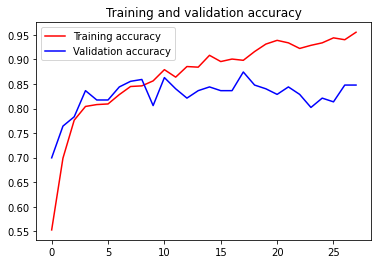

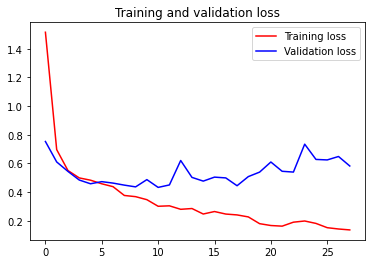

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.save('D:/Kuliah/Semester 6/Bangkit/Capstone Project/test')

INFO:tensorflow:Assets written to: D:/Kuliah/Semester 6/Bangkit/Capstone Project/test\assets


INFO:tensorflow:Assets written to: D:/Kuliah/Semester 6/Bangkit/Capstone Project/test\assets


In [ ]:
import tensorflow as tf

# Convert the model
saved_model_dir= 'D:/Kuliah/Semester 6/Bangkit/Capstone Project/test'
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
tf.keras.backend.clear_session()

##Model Testing

###SavedModel

In [ ]:
import numpy as np
from keras.preprocessing import image
 
# predicting images
path = 'D:/Kuliah/Semester 6/Bangkit/Capstone Project/bahan demo/normal1.jpg'
img = image.load_img(path, target_size=(512, 512))
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images)
out = np.argmax(classes)
print(classes[0])
if out == 0:
  print('Cataract')
elif out == 1:
  print('Glaucoma')
else:
  print('normal')

[2.5088747e-04 3.1807730e-01 6.8167186e-01]
normal


###TFLite model

C:\Users\Timothy\AppData\Local\Temp\ipykernel_24008\26149636.py:11: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  im_resized = im.resize((width, height), resample=Image.BILINEAR)


(1, 512, 512, 3)
[[1. 3. 2.]
 [1. 3. 2.]
 [1. 3. 2.]
 [1. 3. 2.]
 [1. 3. 2.]
 [1. 3. 2.]
 [1. 3. 2.]
 [1. 3. 2.]
 [1. 3. 2.]
 [1. 3. 2.]]
[[0.04873225 0.9273897  0.02387808]]


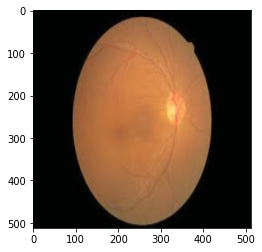

In [22]:
# https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.resize
# Default BICUBIC
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open('D:/Kuliah/Semester 6/Bangkit/Capstone Project/new_model/bahan demo/cataract.jpg')
plt.imshow(im)

# Provide the target width and height of the image
(width, height) = (512, 512)
im_resized = im.resize((width, height), resample=Image.BILINEAR)
plt.imshow(im_resized)

image_a = np.array(im_resized)
#image_a = np.expand_dims(image_a, axis=0)
image_a = np.reshape(image_a,(1,512,512,3))

print(image_a.shape)

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="D:/Kuliah/Semester 6/Bangkit/Capstone Project/new_model/new.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(image_a, dtype=np.float32)
print(input_data[0][0][0:10])
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)